In [72]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
sales_df = pd.read_csv("store_sales_per_category.csv", delimiter=';') #store_sales_per_category.csv contains weekly sales volume (in Euro’s) for stores in scope for 7 different products.
distance_df = pd.read_csv("store_distances_anonymized.csv") #store_distances_anonymized.csv contains distances in kilometers between each pair of stores that are within 5 kilometers of each other.
institution_df = pd.read_csv("gdata_anonymized.csv") #gdata_anonymized.csv contains the number of high education institutions that are within 5 km radius from each store in scope.

In [3]:
sales_df #contains weekly sales volume (in Euro’s) for stores in scope for 7 different products.

,year,week,store_id,Vodka,Tequila,Whiskey,Other,Gin,Brandy,Rum
0,2012,1,0,1824.96,0.00,3645.81,5143.30,0.00,169.86,1507.50
1,2012,1,1,279.01,0.00,251.54,28.35,0.00,31.28,0.00
2,2012,1,2,441.60,0.00,1195.08,2434.44,231.12,162.96,395.76
3,2012,1,7,18432.50,406.68,24344.53,19546.09,3527.14,2113.41,7246.16
4,2012,1,8,3584.56,0.00,7175.44,5970.78,401.81,594.37,1043.21
...,...,...,...,...,...,...,...,...,...,...
248350,2017,44,1848,0.00,53.64,287.48,75.82,23.24,70.35,49.90
248351,2017,44,1850,0.00,21.74,342.41,24.00,0.00,40.80,0.00
248352,2017,44,1851,17.24,21.75,523.57,22.77,20.23,0.00,354.45
248353,2017,44,1854,33.75,0.00,554.47,27.74,11.24,0.00,10.88


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248355 entries, 0 to 248354
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   year      248355 non-null  int64  
 1   week      248355 non-null  int64  
 2   store_id  248355 non-null  int64  
 3   Vodka     248355 non-null  float64
 4   Tequila   248355 non-null  float64
 5   Whiskey   248355 non-null  float64
 6   Other     248355 non-null  float64
 7   Gin       248355 non-null  float64
 8   Brandy    248355 non-null  float64
 9   Rum       248355 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 18.9 MB


In [5]:
sales_df.isnull().sum()

year        0
week        0
store_id    0
Vodka       0
Tequila     0
Whiskey     0
Other       0
Gin         0
Brandy      0
Rum         0
dtype: int64

In [6]:
sales_df['store_id'].max()

1881

In [7]:
sales_df['total_sales'] = sales_df['Vodka'] + sales_df['Tequila'] + sales_df['Whiskey'] + sales_df['Other'] + sales_df['Gin'] + sales_df['Brandy'] + sales_df['Rum']
sales_df

,year,week,store_id,Vodka,Tequila,Whiskey,Other,Gin,Brandy,Rum,total_sales
0,2012,1,0,1824.96,0.00,3645.81,5143.30,0.00,169.86,1507.50,12291.43
1,2012,1,1,279.01,0.00,251.54,28.35,0.00,31.28,0.00,590.18
2,2012,1,2,441.60,0.00,1195.08,2434.44,231.12,162.96,395.76,4860.96
3,2012,1,7,18432.50,406.68,24344.53,19546.09,3527.14,2113.41,7246.16,75616.51
4,2012,1,8,3584.56,0.00,7175.44,5970.78,401.81,594.37,1043.21,18770.17
...,...,...,...,...,...,...,...,...,...,...,...
248350,2017,44,1848,0.00,53.64,287.48,75.82,23.24,70.35,49.90,560.43
248351,2017,44,1850,0.00,21.74,342.41,24.00,0.00,40.80,0.00,428.95
248352,2017,44,1851,17.24,21.75,523.57,22.77,20.23,0.00,354.45,960.01
248353,2017,44,1854,33.75,0.00,554.47,27.74,11.24,0.00,10.88,638.08


In [8]:
#Tabulating weekly sales data into yearly
yearly_sales_df = sales_df.groupby(['year', 'store_id'])['total_sales'].sum().reset_index()
yearly_sales_pivot = yearly_sales_df.pivot(index='store_id', columns='year', values='total_sales')
yearly_sales_pivot = yearly_sales_pivot.fillna(0)
yearly_sales_pivot

year,2012,2013,2014,2015,2016,2017
store_id,,,,,,
0,753891.42,763862.71,969020.45,1025552.20,771320.89,373212.28
1,29248.76,75818.43,74221.41,63933.31,58261.55,30080.85
2,732004.09,726832.64,672241.50,728191.27,613813.06,359912.93
3,43872.69,0.00,0.00,0.00,0.00,0.00
4,83120.24,90467.83,81843.16,63121.42,7943.37,0.00
...,...,...,...,...,...,...
1876,0.00,0.00,0.00,0.00,753.06,409.56
1877,0.00,0.00,0.00,0.00,19.50,0.00
1878,0.00,0.00,0.00,0.00,78.00,0.00


In [9]:
yearly_sales_pivot['total_sales'] = (yearly_sales_pivot[2012] + yearly_sales_pivot[2013] + yearly_sales_pivot[2014] + yearly_sales_pivot[2015] + yearly_sales_pivot[2016] + yearly_sales_pivot[2017])

#Previous performance
yearly_sales_pivot['growth_2013'] = ((yearly_sales_pivot[2013]-yearly_sales_pivot[2012])/yearly_sales_pivot[2012])
yearly_sales_pivot['growth_2014'] = ((yearly_sales_pivot[2014]-yearly_sales_pivot[2013])/yearly_sales_pivot[2013])
yearly_sales_pivot['growth_2015'] = ((yearly_sales_pivot[2015]-yearly_sales_pivot[2014])/yearly_sales_pivot[2014])
yearly_sales_pivot['growth_2016'] = ((yearly_sales_pivot[2016]-yearly_sales_pivot[2015])/yearly_sales_pivot[2015])
yearly_sales_pivot.fillna(0)

#Current performance (2016 vs 2017 YTD)
sales2016_df = sales_df[(sales_df['year'] >= 2016) & (sales_df['week'] <= 44)].groupby(['year','store_id'])['total_sales'].sum().reset_index()
sales2016_2017_df = sales2016_df.pivot(index='store_id', columns='year', values='total_sales')
sales2016_2017_df['growth_2017'] = (sales2016_2017_df[2017] - sales2016_2017_df[2016])/sales2016_2017_df[2016]
sales2016_2017_df = sales2016_2017_df.reset_index()
sales2016_2017_df = sales2016_2017_df.fillna(0)

#add 2017 growth to yearly_sales_pivot
merged_df = pd.merge(yearly_sales_pivot, sales2016_2017_df[['store_id', 'growth_2017']], on='store_id', how='left')
merged_df.fillna(0)
merged_df = merged_df.replace([np.nan, np.inf], 0)
merged_df

year,store_id,2012,2013,2014,2015,2016,2017,total_sales,growth_2013,growth_2014,growth_2015,growth_2016,growth_2017
0,0,753891.42,763862.71,969020.45,1025552.20,771320.89,373212.28,4656859.95,0.013226,0.268579,0.058339,-0.247897,-0.465818
1,1,29248.76,75818.43,74221.41,63933.31,58261.55,30080.85,331564.31,1.592193,-0.021064,-0.138614,-0.088714,-0.405703
2,2,732004.09,726832.64,672241.50,728191.27,613813.06,359912.93,3832995.49,-0.007065,-0.075108,0.083229,-0.157072,-0.347025
3,3,43872.69,0.00,0.00,0.00,0.00,0.00,43872.69,-1.000000,0.000000,0.000000,0.000000,0.000000
4,4,83120.24,90467.83,81843.16,63121.42,7943.37,0.00,326496.02,0.088397,-0.095334,-0.228751,-0.874157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,0.00,0.00,0.00,0.00,753.06,409.56,1162.62,0.000000,0.000000,0.000000,0.000000,-0.456139
1707,1877,0.00,0.00,0.00,0.00,19.50,0.00,19.50,0.000000,0.000000,0.000000,0.000000,0.000000
1708,1878,0.00,0.00,0.00,0.00,78.00,0.00,78.00,0.000000,0.000000,0.000000,0.000000,0.000000
1709,1879,0.00,0.00,0.00,0.00,144.00,0.00,144.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
distance_df
#contains distances in kilometers between each pair of stores that are within 5 kilometers of each other.

,store_id_1,store_id_2,distance
0,0,80,4.472470
1,0,87,1.621428
2,0,140,2.226306
3,0,174,2.904311
4,0,348,3.788029
...,...,...,...
15780,1858,1869,0.001590
15781,1859,1872,0.000000
15782,1863,1874,0.000000
15783,1865,1880,0.000000


In [11]:
distance_df.isnull().sum()

store_id_1    0
store_id_2    0
distance      0
dtype: int64

In [12]:
distance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15785 entries, 0 to 15784
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id_1  15785 non-null  int64  
 1   store_id_2  15785 non-null  int64  
 2   distance    15785 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 370.1 KB


In [13]:
competition_df = distance_df.groupby('store_id_1').size().reset_index(name="competitors")
competition_df['ave_distance'] = distance_df.groupby('store_id_1')['distance'].mean()
competition_df = competition_df.fillna(0)
competition_df.rename(columns={'store_id_1': 'store_id'}, inplace=True)
competition_df

,store_id,competitors,ave_distance
0,0,28,2.420927
1,1,1,0.084720
2,2,63,2.663611
3,3,4,0.417607
4,4,2,0.002576
...,...,...,...
1379,1858,1,2.694808
1380,1859,1,0.000000
1381,1863,1,0.471165
1382,1865,1,0.000000


In [14]:
merged_df2 = pd.merge(merged_df, competition_df, on='store_id', how='left')
merged_df2.fillna(value=0, inplace=True)
merged_df2

,store_id,2012,2013,2014,2015,2016,2017,total_sales,growth_2013,growth_2014,growth_2015,growth_2016,growth_2017,competitors,ave_distance
0,0,753891.42,763862.71,969020.45,1025552.20,771320.89,373212.28,4656859.95,0.013226,0.268579,0.058339,-0.247897,-0.465818,28.0,2.420927
1,1,29248.76,75818.43,74221.41,63933.31,58261.55,30080.85,331564.31,1.592193,-0.021064,-0.138614,-0.088714,-0.405703,1.0,0.084720
2,2,732004.09,726832.64,672241.50,728191.27,613813.06,359912.93,3832995.49,-0.007065,-0.075108,0.083229,-0.157072,-0.347025,63.0,2.663611
3,3,43872.69,0.00,0.00,0.00,0.00,0.00,43872.69,-1.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.417607
4,4,83120.24,90467.83,81843.16,63121.42,7943.37,0.00,326496.02,0.088397,-0.095334,-0.228751,-0.874157,0.000000,2.0,0.002576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,0.00,0.00,0.00,0.00,753.06,409.56,1162.62,0.000000,0.000000,0.000000,0.000000,-0.456139,0.0,0.000000
1707,1877,0.00,0.00,0.00,0.00,19.50,0.00,19.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1708,1878,0.00,0.00,0.00,0.00,78.00,0.00,78.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1709,1879,0.00,0.00,0.00,0.00,144.00,0.00,144.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [15]:
institution_df
#contains the number of high education institutions that are within 5 km radius from each store in scope.

,university or college,foodstores or supermarkets or gorceries,restaurant,churches,gym,stadium,store_id
0,0,0,4,4,0,0,1856
1,0,0,20,15,3,0,1857
2,0,0,4,6,0,1,1858
3,0,0,0,4,0,0,1859
4,0,0,1,0,0,0,1860
...,...,...,...,...,...,...,...
1877,0,0,2,4,0,0,1851
1878,0,0,1,6,0,0,1852
1879,0,0,5,5,0,0,1853
1880,0,1,7,6,0,0,1854


In [16]:
institution_df.isnull().sum()

university or college                      0
foodstores or supermarkets or gorceries    0
restaurant                                 0
churches                                   0
gym                                        0
stadium                                    0
store_id                                   0
dtype: int64

In [17]:
institution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   university or college                    1882 non-null   int64
 1   foodstores or supermarkets or gorceries  1882 non-null   int64
 2   restaurant                               1882 non-null   int64
 3   churches                                 1882 non-null   int64
 4   gym                                      1882 non-null   int64
 5   stadium                                  1882 non-null   int64
 6   store_id                                 1882 non-null   int64
dtypes: int64(7)
memory usage: 103.0 KB


In [18]:
institution_df['total_institutions'] = institution_df['university or college'] + institution_df['foodstores or supermarkets or gorceries'] + institution_df['restaurant'] + institution_df['churches'] + institution_df['gym'] + institution_df['stadium']
institution_df.fillna(0)

,university or college,foodstores or supermarkets or gorceries,restaurant,churches,gym,stadium,store_id,total_institutions
0,0,0,4,4,0,0,1856,8
1,0,0,20,15,3,0,1857,38
2,0,0,4,6,0,1,1858,11
3,0,0,0,4,0,0,1859,4
4,0,0,1,0,0,0,1860,1
...,...,...,...,...,...,...,...,...
1877,0,0,2,4,0,0,1851,6
1878,0,0,1,6,0,0,1852,7
1879,0,0,5,5,0,0,1853,10
1880,0,1,7,6,0,0,1854,14


In [19]:
final_df = pd.merge(merged_df2, institution_df, on='store_id', how='left')
final_df.fillna(0)

,store_id,2012,2013,2014,2015,2016,2017,total_sales,growth_2013,growth_2014,...,growth_2017,competitors,ave_distance,university or college,foodstores or supermarkets or gorceries,restaurant,churches,gym,stadium,total_institutions
0,0,753891.42,763862.71,969020.45,1025552.20,771320.89,373212.28,4656859.95,0.013226,0.268579,...,-0.465818,28.0,2.420927,5,7,20,20,20,3,75
1,1,29248.76,75818.43,74221.41,63933.31,58261.55,30080.85,331564.31,1.592193,-0.021064,...,-0.405703,1.0,0.084720,0,0,0,0,0,0,0
2,2,732004.09,726832.64,672241.50,728191.27,613813.06,359912.93,3832995.49,-0.007065,-0.075108,...,-0.347025,63.0,2.663611,2,8,20,20,16,4,70
3,3,43872.69,0.00,0.00,0.00,0.00,0.00,43872.69,-1.000000,0.000000,...,0.000000,4.0,0.417607,0,2,9,11,3,0,25
4,4,83120.24,90467.83,81843.16,63121.42,7943.37,0.00,326496.02,0.088397,-0.095334,...,0.000000,2.0,0.002576,0,0,1,6,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,0.00,0.00,0.00,0.00,753.06,409.56,1162.62,0.000000,0.000000,...,-0.456139,0.0,0.000000,0,0,2,1,1,0,4
1707,1877,0.00,0.00,0.00,0.00,19.50,0.00,19.50,0.000000,0.000000,...,0.000000,0.0,0.000000,5,8,20,20,20,3,76
1708,1878,0.00,0.00,0.00,0.00,78.00,0.00,78.00,0.000000,0.000000,...,0.000000,0.0,0.000000,0,3,20,19,10,0,52
1709,1879,0.00,0.00,0.00,0.00,144.00,0.00,144.00,0.000000,0.000000,...,0.000000,0.0,0.000000,0,0,8,6,1,0,15


In [20]:
growth_columns = ['growth_2013', 'growth_2014', 'growth_2015', 'growth_2016', 'growth_2017']
growth_data = final_df[growth_columns].replace(0, pd.NA)
final_df['average_growth'] = growth_data.mean(axis=1, skipna=True)
final_df.fillna(0)

,store_id,2012,2013,2014,2015,2016,2017,total_sales,growth_2013,growth_2014,...,competitors,ave_distance,university or college,foodstores or supermarkets or gorceries,restaurant,churches,gym,stadium,total_institutions,average_growth
0,0,753891.42,763862.71,969020.45,1025552.20,771320.89,373212.28,4656859.95,0.013226,0.268579,...,28.0,2.420927,5,7,20,20,20,3,75,-0.074714
1,1,29248.76,75818.43,74221.41,63933.31,58261.55,30080.85,331564.31,1.592193,-0.021064,...,1.0,0.084720,0,0,0,0,0,0,0,0.187620
2,2,732004.09,726832.64,672241.50,728191.27,613813.06,359912.93,3832995.49,-0.007065,-0.075108,...,63.0,2.663611,2,8,20,20,16,4,70,-0.100608
3,3,43872.69,0.00,0.00,0.00,0.00,0.00,43872.69,-1.000000,0.000000,...,4.0,0.417607,0,2,9,11,3,0,25,-1.000000
4,4,83120.24,90467.83,81843.16,63121.42,7943.37,0.00,326496.02,0.088397,-0.095334,...,2.0,0.002576,0,0,1,6,0,0,7,-0.277461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,0.00,0.00,0.00,0.00,753.06,409.56,1162.62,0.000000,0.000000,...,0.0,0.000000,0,0,2,1,1,0,4,-0.456139
1707,1877,0.00,0.00,0.00,0.00,19.50,0.00,19.50,0.000000,0.000000,...,0.0,0.000000,5,8,20,20,20,3,76,0.000000
1708,1878,0.00,0.00,0.00,0.00,78.00,0.00,78.00,0.000000,0.000000,...,0.0,0.000000,0,3,20,19,10,0,52,0.000000
1709,1879,0.00,0.00,0.00,0.00,144.00,0.00,144.00,0.000000,0.000000,...,0.0,0.000000,0,0,8,6,1,0,15,0.000000


In [50]:
sales_columns = [2012,2013,2014,2015,2016,2017]
sales_data = final_df[sales_columns].replace(0, pd.NA)
final_df['average_sales'] = sales_data.mean(axis=1, skipna=True)
final_df.fillna(0)

,store_id,2012,2013,2014,2015,2016,2017,total_sales,growth_2013,growth_2014,...,ave_distance,university or college,foodstores or supermarkets or gorceries,restaurant,churches,gym,stadium,total_institutions,average_growth,average_sales
0,0,753891.42,763862.71,969020.45,1025552.20,771320.89,373212.28,4656859.95,0.013226,0.268579,...,2.420927,5,7,20,20,20,3,75,-0.074714,776143.325000
1,1,29248.76,75818.43,74221.41,63933.31,58261.55,30080.85,331564.31,1.592193,-0.021064,...,0.084720,0,0,0,0,0,0,0,0.187620,55260.718333
2,2,732004.09,726832.64,672241.50,728191.27,613813.06,359912.93,3832995.49,-0.007065,-0.075108,...,2.663611,2,8,20,20,16,4,70,-0.100608,638832.581667
3,3,43872.69,0.00,0.00,0.00,0.00,0.00,43872.69,-1.000000,0.000000,...,0.417607,0,2,9,11,3,0,25,-1.000000,43872.690000
4,4,83120.24,90467.83,81843.16,63121.42,7943.37,0.00,326496.02,0.088397,-0.095334,...,0.002576,0,0,1,6,0,0,7,-0.277461,65299.204000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,0.00,0.00,0.00,0.00,753.06,409.56,1162.62,0.000000,0.000000,...,0.000000,0,0,2,1,1,0,4,-0.456139,581.310000
1707,1877,0.00,0.00,0.00,0.00,19.50,0.00,19.50,0.000000,0.000000,...,0.000000,5,8,20,20,20,3,76,0.000000,19.500000
1708,1878,0.00,0.00,0.00,0.00,78.00,0.00,78.00,0.000000,0.000000,...,0.000000,0,3,20,19,10,0,52,0.000000,78.000000
1709,1879,0.00,0.00,0.00,0.00,144.00,0.00,144.00,0.000000,0.000000,...,0.000000,0,0,8,6,1,0,15,0.000000,144.000000


In [53]:
columns_of_interest = ['competitors', 'ave_distance', 'university or college', 
                       'foodstores or supermarkets or gorceries', 'restaurant', 
                       'churches', 'gym', 'stadium', 'total_institutions','average_growth','total_sales','average_sales']

correlation = final_df[columns_of_interest].corr()
correlation_with_total_sales = correlation['total_sales'].sort_values(ascending=False)

correlation_with_total_sales

total_sales                                1.000000
average_sales                              0.991072
competitors                                0.308941
total_institutions                         0.185496
gym                                        0.175319
restaurant                                 0.162903
churches                                   0.158661
foodstores or supermarkets or gorceries    0.157766
university or college                      0.152815
stadium                                    0.132018
ave_distance                               0.093974
average_growth                            -0.056246
Name: total_sales, dtype: float64

In [54]:
correlation_with_average_growth = correlation['average_growth'].sort_values(ascending=False)

correlation_with_average_growth

average_growth                             1.000000
university or college                     -0.031040
stadium                                   -0.046012
restaurant                                -0.047564
foodstores or supermarkets or gorceries   -0.052634
total_sales                               -0.056246
average_sales                             -0.058661
total_institutions                        -0.059953
gym                                       -0.060131
churches                                  -0.060563
ave_distance                              -0.101150
competitors                               -0.134619
Name: average_growth, dtype: float64

In [55]:
correlation_with_average_sales = correlation['average_sales'].sort_values(ascending=False)

correlation_with_average_sales

average_sales                              1.000000
total_sales                                0.991072
competitors                                0.314399
total_institutions                         0.201045
gym                                        0.188972
restaurant                                 0.174812
university or college                      0.173312
foodstores or supermarkets or gorceries    0.172096
churches                                   0.170680
stadium                                    0.142454
ave_distance                               0.104879
average_growth                            -0.058661
Name: average_sales, dtype: float64

# K-Means Clustering

In [24]:
revised_final_df = final_df.drop(columns=[2012,2013,2014,2015,2016,2017,'growth_2013','growth_2014','growth_2015','growth_2016','growth_2017','university or college','foodstores or supermarkets or gorceries','restaurant','churches','gym','stadium'])
revised_final_df.fillna(value=0, inplace=True)
revised_final_df

,store_id,total_sales,competitors,ave_distance,total_institutions,average_growth,average_sales
0,0,4656859.95,28.0,2.420927,75,-0.074714,776143.325000
1,1,331564.31,1.0,0.084720,0,0.187620,55260.718333
2,2,3832995.49,63.0,2.663611,70,-0.100608,638832.581667
3,3,43872.69,4.0,0.417607,25,-1.000000,43872.690000
4,4,326496.02,2.0,0.002576,7,-0.277461,65299.204000
...,...,...,...,...,...,...,...
1706,1876,1162.62,0.0,0.000000,4,-0.456139,581.310000
1707,1877,19.50,0.0,0.000000,76,0.000000,19.500000
1708,1878,78.00,0.0,0.000000,52,0.000000,78.000000
1709,1879,144.00,0.0,0.000000,15,0.000000,144.000000


In [25]:
revised_final_df.describe()

,store_id,total_sales,competitors,ave_distance,total_institutions,average_growth,average_sales
count,1711.000000,1.711000e+03,1711.000000,1711.000000,1711.000000,1711.000000,1.711000e+03
mean,931.053185,5.559661e+05,8.544126,1.274754,45.355932,0.225955,1.049894e+05
std,545.504835,1.442289e+06,12.058251,1.376693,26.882093,1.619007,2.432820e+05
min,0.000000,1.950000e+01,0.000000,0.000000,0.000000,-1.000000,1.950000e+01
25%,462.500000,5.667528e+04,0.000000,0.000000,17.500000,-0.134439,1.735764e+04
50%,921.000000,1.687629e+05,3.000000,0.655030,49.000000,-0.030663,4.067879e+04
75%,1398.500000,4.952597e+05,12.000000,2.678051,70.000000,0.090283,9.794727e+04
max,1881.000000,3.054662e+07,64.000000,4.894010,92.000000,36.912818,5.091104e+06


In [26]:
scaler = StandardScaler()

In [31]:
scaled_values = scaler.fit_transform(revised_final_df[['total_sales', 'competitors', 'ave_distance', 'total_institutions', 'average_growth', 'average_sales']])
scaled_df = pd.DataFrame(scaled_values, columns=['total_sales_T', 'competitors_T', 'ave_distance_T', 'total_institutions_T', 'average_growth_T', 'average_sales_T'])

revised_final_df = pd.concat([revised_final_df, scaled_df], axis=1)
revised_final_df

,store_id,total_sales,competitors,ave_distance,total_institutions,average_growth,average_sales,total_sales_T,competitors_T,ave_distance_T,total_institutions_T,average_growth_T,average_sales_T
0,0,4656859.95,28.0,2.420927,75,-0.074714,776143.325000,2.844154,1.613962,0.832799,1.103066,-0.185766,2.759555
1,1,331564.31,1.0,0.084720,0,0.187620,55260.718333,-0.155633,-0.625823,-0.864668,-1.687711,-0.023685,-0.204467
2,2,3832995.49,63.0,2.663611,70,-0.100608,638832.581667,2.272767,4.517388,1.009131,0.917015,-0.201765,2.194980
3,3,43872.69,4.0,0.417607,25,-1.000000,43872.690000,-0.355160,-0.376958,-0.622796,-0.757452,-0.757448,-0.251291
4,4,326496.02,2.0,0.002576,7,-0.277461,65299.204000,-0.159148,-0.542868,-0.924353,-1.427238,-0.311032,-0.163193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,1162.62,0.0,0.000000,4,-0.456139,581.310000,-0.384781,-0.708778,-0.926225,-1.538869,-0.421427,-0.429290
1707,1877,19.50,0.0,0.000000,76,0.000000,19.500000,-0.385574,-0.708778,-0.926225,1.140277,-0.139605,-0.431600
1708,1878,78.00,0.0,0.000000,52,0.000000,78.000000,-0.385533,-0.708778,-0.926225,0.247228,-0.139605,-0.431360
1709,1879,144.00,0.0,0.000000,15,0.000000,144.000000,-0.385488,-0.708778,-0.926225,-1.129555,-0.139605,-0.431088


In [35]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k + 1):  # Include max_k
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Elbow plot
    plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')              
    plt.grid(True)
    plt.show()


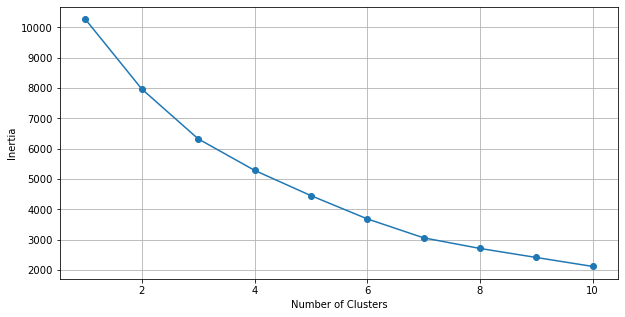

In [36]:
optimize_k_means(revised_final_df[['total_sales_T', 'competitors_T','ave_distance_T','total_institutions_T','average_growth_T','average_sales_T']], 10)

In [44]:
#kmeans = KMeans (n_clusters=3)
#kmeans.fit(revised_final_df[['total_sales_T', 'competitors_T','ave_distance_T','total_institutions_T','average_growth_T','average_sales_T']])
#revised_final_df['kmeans_3']=kmeans.labels_

In [39]:
# Select relevant features for clustering
features = revised_final_df[['total_sales', 'competitors', 'ave_distance', 'total_institutions', 
               'average_growth', 'average_sales']]

# Step 2: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Fit the K-means model
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_scaled)

revised_final_df['cluster'] = kmeans.labels_
revised_final_df

,store_id,total_sales,competitors,ave_distance,total_institutions,average_growth,average_sales,total_sales_T,competitors_T,ave_distance_T,total_institutions_T,average_growth_T,average_sales_T,cluster
0,0,4656859.95,28.0,2.420927,75,-0.074714,776143.325000,2.844154,1.613962,0.832799,1.103066,-0.185766,2.759555,0
1,1,331564.31,1.0,0.084720,0,0.187620,55260.718333,-0.155633,-0.625823,-0.864668,-1.687711,-0.023685,-0.204467,1
2,2,3832995.49,63.0,2.663611,70,-0.100608,638832.581667,2.272767,4.517388,1.009131,0.917015,-0.201765,2.194980,0
3,3,43872.69,4.0,0.417607,25,-1.000000,43872.690000,-0.355160,-0.376958,-0.622796,-0.757452,-0.757448,-0.251291,1
4,4,326496.02,2.0,0.002576,7,-0.277461,65299.204000,-0.159148,-0.542868,-0.924353,-1.427238,-0.311032,-0.163193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,1162.62,0.0,0.000000,4,-0.456139,581.310000,-0.384781,-0.708778,-0.926225,-1.538869,-0.421427,-0.429290,1
1707,1877,19.50,0.0,0.000000,76,0.000000,19.500000,-0.385574,-0.708778,-0.926225,1.140277,-0.139605,-0.431600,1
1708,1878,78.00,0.0,0.000000,52,0.000000,78.000000,-0.385533,-0.708778,-0.926225,0.247228,-0.139605,-0.431360,1
1709,1879,144.00,0.0,0.000000,15,0.000000,144.000000,-0.385488,-0.708778,-0.926225,-1.129555,-0.139605,-0.431088,1


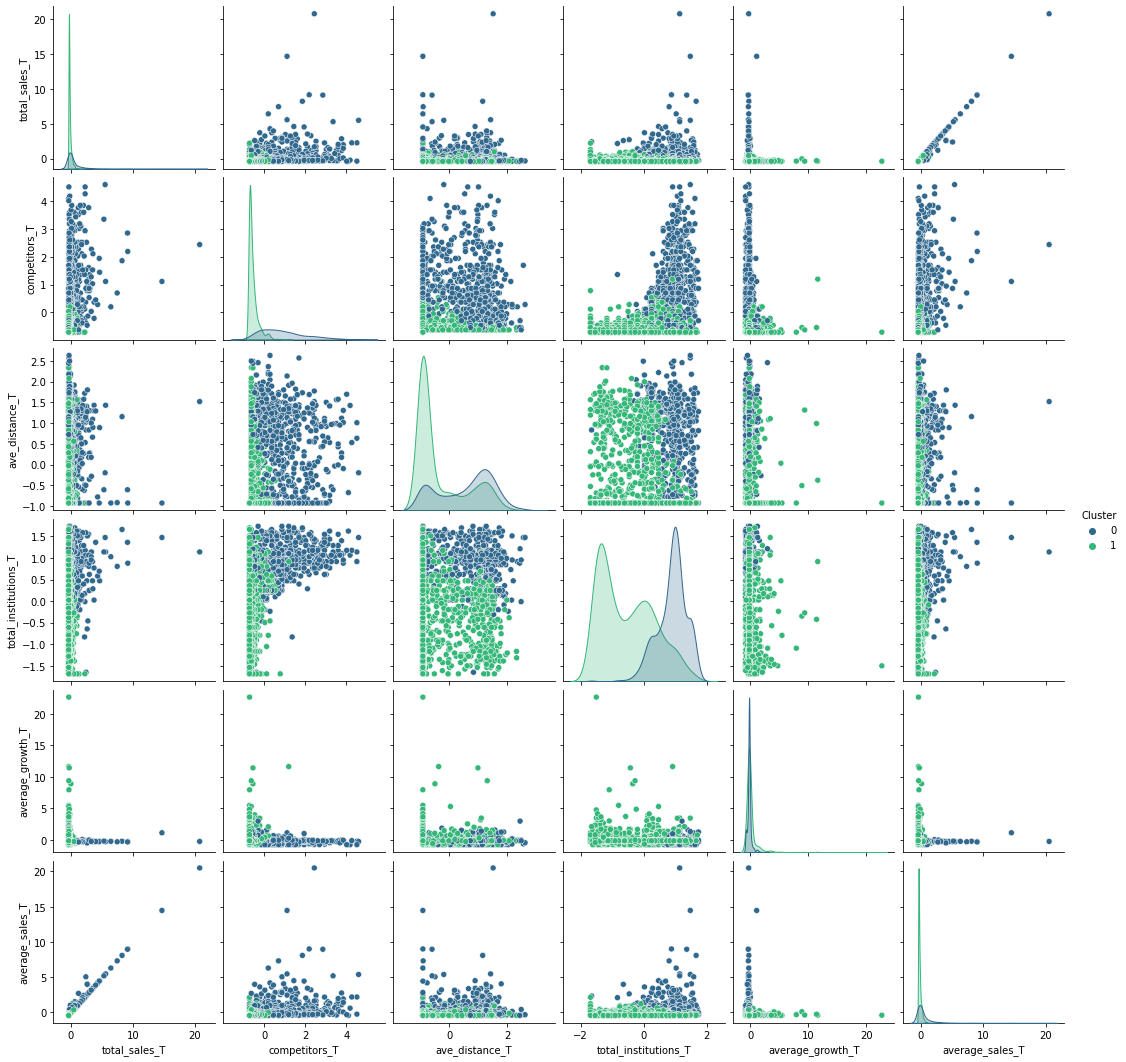

In [42]:
df_features = pd.DataFrame(features_scaled, columns=['total_sales_T', 'competitors_T', 'ave_distance_T', 'total_institutions_T', 'average_growth_T', 'average_sales_T'])
df_features['Cluster'] = kmeans.labels_
sns.pairplot(df_features, hue='Cluster', palette='viridis')
plt.show()

# Prediction Model

In [70]:
prediction_df = revised_final_df
prediction_df.rename(columns={'cluster': 'decision'}, inplace=True)
prediction_df

,store_id,total_sales,competitors,ave_distance,total_institutions,average_growth,average_sales,total_sales_T,competitors_T,ave_distance_T,total_institutions_T,average_growth_T,average_sales_T,decision
0,0,4656859.95,28.0,2.420927,75,-0.074714,776143.325000,2.844154,1.613962,0.832799,1.103066,-0.185766,2.759555,0
1,1,331564.31,1.0,0.084720,0,0.187620,55260.718333,-0.155633,-0.625823,-0.864668,-1.687711,-0.023685,-0.204467,1
2,2,3832995.49,63.0,2.663611,70,-0.100608,638832.581667,2.272767,4.517388,1.009131,0.917015,-0.201765,2.194980,0
3,3,43872.69,4.0,0.417607,25,-1.000000,43872.690000,-0.355160,-0.376958,-0.622796,-0.757452,-0.757448,-0.251291,1
4,4,326496.02,2.0,0.002576,7,-0.277461,65299.204000,-0.159148,-0.542868,-0.924353,-1.427238,-0.311032,-0.163193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1876,1162.62,0.0,0.000000,4,-0.456139,581.310000,-0.384781,-0.708778,-0.926225,-1.538869,-0.421427,-0.429290,1
1707,1877,19.50,0.0,0.000000,76,0.000000,19.500000,-0.385574,-0.708778,-0.926225,1.140277,-0.139605,-0.431600,1
1708,1878,78.00,0.0,0.000000,52,0.000000,78.000000,-0.385533,-0.708778,-0.926225,0.247228,-0.139605,-0.431360,1
1709,1879,144.00,0.0,0.000000,15,0.000000,144.000000,-0.385488,-0.708778,-0.926225,-1.129555,-0.139605,-0.431088,1


In [77]:
# Assuming final_df is your DataFrame with the features and 'decision' column
# Select your features (excluding 'decision') and the target ('decision')
features = prediction_df[['total_sales', 'competitors', 'ave_distance', 'total_institutions', 'average_growth']]
target = prediction_df['decision']  # The decision column, which is your cluster result

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.3735408560311284
Confusion Matrix:
[[192   0]
 [322   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       192
           1       0.00      0.00      0.00       322

    accuracy                           0.37       514
   macro avg       0.19      0.50      0.27       514
weighted avg       0.14      0.37      0.20       514

